In [6]:
import tensorflow as tf
import os
import sys
import collections
reload(project)

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)
from rl import action_learner, action_learner_search, value_estimator
from progress_learner import EventProgressEstimator
import config
import project
# Need to add this import to load class
from project import Project, Multi_Project
from importlib import reload
from rl import block_movement_env
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotting


In [11]:
multi_p = project.Multi_Project.load("../all_actions.proj")

In [13]:
reload(config)
c = config.Config()
c.no_of_loops = 1
# c.constraint_sigma = 0
reload(block_movement_env)
# reload(value_estimator)
reload(action_learner_search)
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)

sess =  tf.Session()

policy_est = action_learner_search.PolicyEstimator(c)

sess.run(tf.global_variables_initializer())

for p in multi_p:
    if p.name != 'SlideAround':
        continue
        
    s = "model_" + p.name

    with tf.variable_scope(s) as scope:
        print('-------- Load progress model ---------')
        progress_estimator = EventProgressEstimator(is_training=False, name = p.name, config = c)  

    saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope=s))
    saver.restore(sess, '../progress_all.mod')

-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (30, 200) after LSTM
self.output.shape = (30,) after linear
self._targets.shape = (?,) 
INFO:tensorflow:Restoring parameters from ../progress_all.mod


In [37]:
a = block_movement_env.BlockMovementEnv(c, p.speed, progress_estimator = progress_estimator, session = sess)

In [38]:
a.test_case(a.bad_case_1)

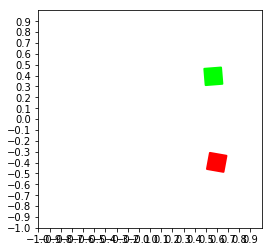

(None, None)
[ 0.22539376  0.88562338  0.33300875]
[[ 0.52279422 -0.24387278  0.66882214 -0.27816342  0.63453149 -0.42419134
   0.48850358 -0.38990069 -0.01373775  0.06702583 -0.01575967  0.05933703
  -0.02344847  0.06135895 -0.02142655  0.06904775  0.6359926   0.47409506
   0.64788251  0.32456703  0.49835448  0.31267712  0.48646457  0.46220515
   0.          0.          0.          0.          0.          0.          0.
   0.         -0.11319837 -0.71796784  0.02093963 -0.60273046  0.13617701
  -0.73686846  0.00203901 -0.85210584]
 [ 0.50905647 -0.17684695  0.65306247 -0.21882639  0.61108303 -0.36283238
   0.46707703 -0.32085294 -0.01359445  0.0667646  -0.0160209   0.05919373
  -0.02359177  0.06162018 -0.02116532  0.06919105  0.6359926   0.47409506
   0.64788251  0.32456703  0.49835448  0.31267712  0.48646457  0.46220515
   0.          0.          0.          0.          0.          0.          0.
   0.         -0.12693612 -0.65094201  0.00517996 -0.54339342  0.11272854
  -0.67550951 

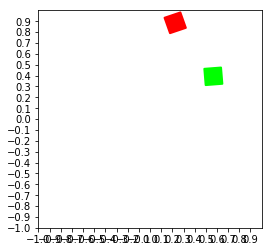

(None, None)
[ 0.47532061 -0.01304514  0.4202172 ]
[[  5.00244877e-01  -1.33617525e-01   6.42726659e-01  -1.80510400e-01
    5.95833783e-01  -3.22992182e-01   4.53352001e-01  -2.76099307e-01
   -2.28647845e-02   1.12902274e-01  -2.76560824e-02   1.00286070e-01
   -4.02722864e-02   1.05077368e-01  -3.54809885e-02   1.17693572e-01
    6.35992596e-01   4.74095058e-01   6.47882508e-01   3.24567034e-01
    4.98354484e-01   3.12677122e-01   4.86464572e-01   4.62205146e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -1.35747720e-01  -6.07712582e-01  -5.15584925e-03  -5.05077434e-01
    9.74792991e-02  -6.35669304e-01  -3.31125711e-02  -7.38304453e-01]
 [  4.77380092e-01  -2.07152504e-02   6.15070576e-01  -8.02243301e-02
    5.55561497e-01  -2.17914814e-01   4.17871012e-01  -1.58405735e-01
   -2.25483668e-02   1.12104163e-01  -2.84541934e-02   9.99696524e-02
   -4.05887041e-02   1.05875479e-01  -

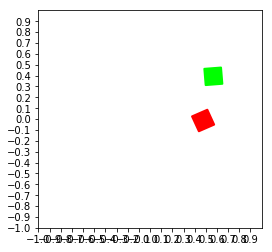

(None, None)
[ 0.83911565 -0.2808123   0.25341885]
[[  5.00574541e-01  -1.35237945e-01   6.43116566e-01  -1.81947377e-01
    5.96407133e-01  -3.24489402e-01   4.53865108e-01  -2.77779970e-01
   -2.73818135e-02   1.35294215e-01  -3.32417912e-02   1.20213535e-01
   -4.83224706e-02   1.26073513e-01  -4.24624929e-02   1.41154192e-01
    6.35992596e-01   4.74095058e-01   6.47882508e-01   3.24567034e-01
    4.98354484e-01   3.12677122e-01   4.86464572e-01   4.62205146e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -1.35418056e-01  -6.09333003e-01  -4.76594225e-03  -5.06514411e-01
    9.80526493e-02  -6.37166525e-01  -3.25994640e-02  -7.39985116e-01]
 [  4.73192727e-01   5.62698788e-05   6.09874774e-01  -6.17338420e-02
    5.48084663e-01  -1.98415889e-01   4.11402615e-01  -1.36625777e-01
   -2.69461651e-02   1.34139697e-01  -3.43963092e-02   1.19777887e-01
   -4.87581190e-02   1.27228031e-01  -

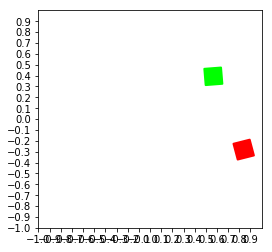

In [39]:
a.replay(verbose = True)

In [32]:
reload(block_movement_env)
action_ln = action_learner_search.ActionLearner_Search(c, p, progress_estimator, 
                               policy_est, session = sess)

def action_policy(config):
    def boundary_constraint(action):
        for i in range(3):
            if action[i] < config.playground_x[i]:
                return False
            if action[i] > config.playground_x[i] + config.playground_dim[i]:
                return False
        
        return True
    
    def q(state, policy_estimator, no_of_actions = 1, verbose = False, 
       session = None):
        return action_learner_search.random_action_constraint(state, policy_estimator,
                    no_of_actions, verbose, session, boundary_constraint)
    
    return q

explorations = action_ln.learn_one_setup(action_policy(c), verbose = True)

action_level = 0
exploration_index = 0
[(0, 0.0014513790374621749), (0, 0.0013931160792708397), (0, 0.0013341434532776475), (0, 0.001180221326649189), (0, 0.0011177825508639216), (0, 0.0010658031096681952), (0, 0.0010575649794191122), (0, 0.0010438294848427176), (0, 0.0010412540286779404), (0, 0.0010363992769271135), (0, 0.0010261768475174904), (0, 0.0010234314249828458), (0, 0.0010218190727755427), (0, 0.00099522806704044342), (0, 0.00099478301126509905), (0, 0.00099152233451604843), (0, 0.00097693188581615686), (0, 0.00097575387917459011), (0, 0.00097404757980257273), (0, 0.00096441939240321517)]
action_level = 1
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
exploration_index = 9
exploration_index = 10
exploration_index = 11
exploration_index = 12
exploration_index = 13
exploration_index = 14
exploration_index = 15
exploration_index =

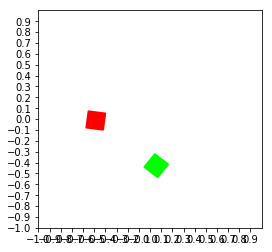

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.8053264   0.88771253  0.78310484]
[[-0.48345646  0.11804336 -0.33542292  0.09383447 -0.35963181 -0.05419908
  -0.50766535 -0.02999019  0.06744079  0.04703307  0.0665636   0.04217295
   0.06170348  0.04305013  0.06258067  0.04791025  0.04271563 -0.3229267
   0.1606607  -0.41560335  0.06798405 -0.53354841 -0.04996101 -0.44087177
   0.          0.          0.          0.          0.          0.          0.
   0.         -0.52617209  0.44097006 -0.49608362  0.50943781 -0.42761586
   0.47934934 -0.45770434  0.41088158]
 [-0.41601567  0.16507642 -0.26885932  0.13600741 -0.29792833 -0.01114894
  -0.44508468  0.01792007  0.06750479  0.04693755  0.06646808  0.04210894
   0.06163948  0.04314565  0.06267618  0.04797426  0.04271563 -0.3229267
   0.1606607  -0.41560335  0.06798405 -0.53354841 -0.04996101 -0.44087177
   0.          0.          0.          0.          0.          0.          0.
   0.         -0.4587

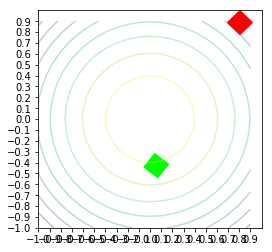

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.48221298 -0.6012749   0.98447857]
[[ -2.81102283e-01   2.58745263e-01  -1.36174778e-01   2.20066869e-01
   -1.74853171e-01   7.51393636e-02  -3.19780677e-01   1.13817757e-01
    1.52237666e-01   1.05030582e-01   1.48977118e-01   9.44091473e-02
    1.38355683e-01   9.76696950e-02   1.41616231e-01   1.08291130e-01
    4.27156322e-02  -3.22926699e-01   1.60660701e-01  -4.15603345e-01
    6.79840544e-02  -5.33548414e-01  -4.99610142e-02  -4.40871768e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -3.23817916e-01   5.81671962e-01  -2.96835479e-01   6.35670215e-01
   -2.42837226e-01   6.08687778e-01  -2.69819663e-01   5.54689525e-01]
 [ -1.28864618e-01   3.63775845e-01   1.28023400e-02   3.14476016e-01
   -3.64974882e-02   1.72809059e-01  -1.78164446e-01   2.22108887e-01
    1.52491051e-01   1.04506713e-01   1

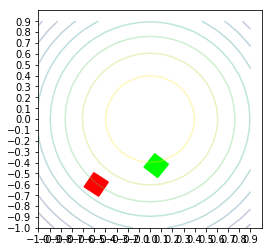

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.71062821  0.68423639  0.41586555]
[[ -5.20351076e-01   9.22537480e-02  -3.71905209e-01   7.07171568e-02
   -3.93441801e-01  -7.77287096e-02  -5.41887667e-01  -5.61921184e-02
    2.26996527e-01   1.58007910e-01   2.23706440e-01   1.41731806e-01
    2.07430336e-01   1.45021894e-01   2.10720424e-01   1.61297998e-01
    4.27156322e-02  -3.22926699e-01   1.60660701e-01  -4.15603345e-01
    6.79840544e-02  -5.33548414e-01  -4.99610142e-02  -4.40871768e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -5.63066708e-01   4.15180447e-01  -5.32565910e-01   4.86320502e-01
   -4.61425855e-01   4.55819704e-01  -4.91926653e-01   3.84679649e-01]
 [ -2.93354549e-01   2.50261658e-01  -1.48198770e-01   2.12448963e-01
   -1.86011465e-01   6.72931843e-02  -3.31167243e-01   1.05105879e-01
    2.27654269e-01   1.56886776e-01   2

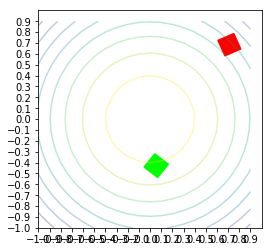

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.3218587  -0.55657212  0.20723405]
[[ -1.76315135e-01   3.31114450e-01  -3.35482561e-02   2.85096864e-01
   -7.95658418e-02   1.42329985e-01  -2.22332721e-01   1.88347571e-01
    2.97507690e-01   2.03672122e-01   2.89392511e-01   1.83591904e-01
    2.69312292e-01   1.91707083e-01   2.77427472e-01   2.11787302e-01
    4.27156322e-02  -3.22926699e-01   1.60660701e-01  -4.15603345e-01
    6.79840544e-02  -5.33548414e-01  -4.99610142e-02  -4.40871768e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -2.19030768e-01   6.54041149e-01  -1.94208957e-01   7.00700209e-01
   -1.47549896e-01   6.75878399e-01  -1.72371707e-01   6.29219338e-01]
 [  1.21192555e-01   5.34786572e-01   2.55844254e-01   4.68688768e-01
    1.89746451e-01   3.34037068e-01   5.50947505e-02   4.00134872e-01
    2.98222282e-01   2.01579548e-01   2

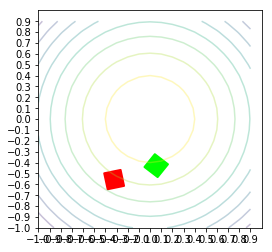

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.3218587  -0.55657212  0.20723405]
[[ -1.76315135e-01   3.31114450e-01  -3.35482561e-02   2.85096864e-01
   -7.95658418e-02   1.42329985e-01  -2.22332721e-01   1.88347571e-01
    2.97507690e-01   2.03672122e-01   2.89392511e-01   1.83591904e-01
    2.69312292e-01   1.91707083e-01   2.77427472e-01   2.11787302e-01
    4.27156322e-02  -3.22926699e-01   1.60660701e-01  -4.15603345e-01
    6.79840544e-02  -5.33548414e-01  -4.99610142e-02  -4.40871768e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -2.19030768e-01   6.54041149e-01  -1.94208957e-01   7.00700209e-01
   -1.47549896e-01   6.75878399e-01  -1.72371707e-01   6.29219338e-01]
 [  1.21192555e-01   5.34786572e-01   2.55844254e-01   4.68688768e-01
    1.89746451e-01   3.34037068e-01   5.50947505e-02   4.00134872e-01
    2.98222282e-01   2.01579548e-01   2

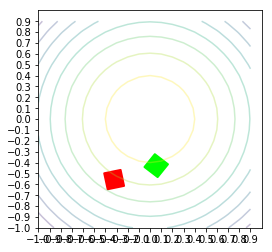

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.50471815  0.73598225  0.06308027]
[[ -5.39637137e-01   7.87559099e-02  -3.90994845e-01   5.86196538e-02
   -4.11131101e-01  -9.00226389e-02  -5.59773393e-01  -6.98863828e-02
    3.62152693e-01   2.51552817e-01   3.56303434e-01   2.25752710e-01
    3.30503327e-01   2.31601969e-01   3.36352586e-01   2.57402076e-01
    4.27156322e-02  -3.22926699e-01   1.60660701e-01  -4.15603345e-01
    6.79840544e-02  -5.33548414e-01  -4.99610142e-02  -4.40871768e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -5.82352770e-01   4.01682609e-01  -5.51655545e-01   4.74222999e-01
   -4.79115155e-01   4.43525775e-01  -5.09812379e-01   3.70985385e-01]
 [ -1.77484444e-01   3.30308727e-01  -3.46914102e-02   2.84372363e-01
   -8.06277737e-02   1.41579330e-01  -2.23420808e-01   1.87515693e-01
    3.63659050e-01   2.48617616e-01   3

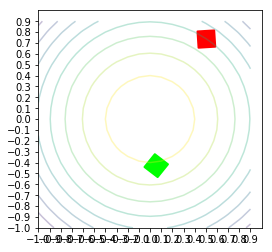

In [40]:
explorations[0].replay(verbose=True)